<a href="https://colab.research.google.com/github/Rohinkumar1841/LGMVIP-DataScience/blob/main/Task_1_intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collection of Data

In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Loading the Dataset
data = pd.read_csv("/content/NSE-TATAGLOBAL.csv")
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


As we can see here, there are different columns for the stock information, from **2010-07-21** to **2018-09-28** but for our use, we will be dealing with the Open price of the stock on a particular day.

In [4]:
df = data.reset_index()['Open']
df.head()

0    234.05
1    234.55
2    240.00
3    233.30
4    233.55
Name: Open, dtype: float64

In [5]:
df.shape

(2035,)

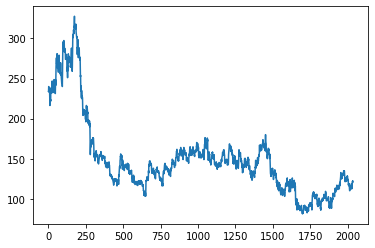

In [6]:
import matplotlib.pyplot as plt
plt.plot(df)

Observing the performance of the stock over the span of 8 years we can conclude that the stock has not performed well and have depreciated the money invested. 

# Preprocessing of Data(Train and Test)

As LSTMs are highly sensitive to their scales, it's a good practice to scale our data between 0 and 1 using MinMaxScaler.</br> NOTE: MinMaxScaler preserves the shape of the original distribution.

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [8]:
df

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [9]:
#splitting dataset into train and test split
length = len(df)
training_size=int(length*0.65) #65% training, 35% testing 
test_size=length-training_size
train_data,test_data=df[0:training_size,:],df[training_size:length,:1]

In [10]:
training_size,test_size

(1322, 713)

In [11]:
# convert an array of values into a dataset matrix

def dataset(dataset, time_step=1):
	dataX, dataY = [], []

	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a) # if steps = 100 then, 0-99 here 
		dataY.append(dataset[i + time_step, 0]) # 100th element here as label
  
	return np.array(dataX), np.array(dataY)

In [12]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4

time_step = 100 # taking previous 100 elements in consideration.

X_train, y_train = dataset(train_data, time_step)
X_test, ytest = dataset(test_data, time_step)

In [13]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [14]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

Before Implementing any type of LSTM model, we are required to convert our X_train,  and X_test into three dimensions

In [15]:
# reshape input to be [samples, time steps, features] which is required for LSTM as (X_train.shape[1],1) will be given as input to LSTM

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Creating an Stacked LSTM Model.
In this section we will be defining a model with 3 LSTMs stacked over each other.

In [16]:
# Importing the necessary libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [17]:
# defining the sequential model

model=Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 11s 266ms/step - loss: 0.0199 - val_loss: 0.0052
Epoch 2/100
20/20 [==============================] - 4s 199ms/step - loss: 0.0032 - val_loss: 9.1634e-04
Epoch 3/100
20/20 [==============================] - 4s 198ms/step - loss: 0.0019 - val_loss: 7.7773e-04
Epoch 4/100
20/20 [==============================] - 4s 197ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 5/100
20/20 [==============================] - 4s 200ms/step - loss: 0.0018 - val_loss: 8.1400e-04
Epoch 6/100
20/20 [==============================] - 4s 199ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 7/100
20/20 [==============================] - 4s 201ms/step - loss: 0.0014 - val_loss: 8.3311e-04
Epoch 8/100
20/20 [==============================] - 4s 198ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 9/100
20/20 [==============================] - 4s 200ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 10/100
20/20 [==============================] - 4s 199ms/step - loss

# Predict the test data and plot the output.

In [20]:
# Lets Do the prediction and check performance metrics

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [21]:
# Transforming the results back to original scale

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [22]:
# Computing the RSME matrices

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

168.3524775546479

In [23]:
math.sqrt(mean_squared_error(ytest,test_predict))

117.24653436331471

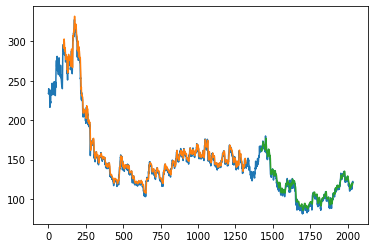

In [24]:
# Plotting the results

# shift train predictions for plotting
look_back=100 #timestamp
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

# plotting the train_predict and test_predict on the same plot as true data.
plt.plot(scaler.inverse_transform(df)) # to scale the data back to original scale.
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In the plot shown above, the blue represents the actual data, whereas the orange part represents the training data, and green represents the predicted output for the test data.

# Predict the stock price for future 30 days.

In [25]:
len(test_data)

713

In [26]:
# Now as we would want to consider the previous 100 values for the prediction we will substract 100 from len(test_data)

x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [27]:
# Converting it into a list

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [28]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16827703]
101
1 day input [0.13746959 0.13990268 0.13017032 0.14152474 0.14111922 0.13138686
 0.12915653 0.13098135 0.1269262  0.15166261 0.15004055 0.14193025
 0.16017843 0.15693431 0.16504461 0.1770073  0.18146796 0.18815896
 0.20924574 0.19424169 0.18106245 0.18207624 0.1960665  0.17680454
 0.18207624 0.18004866 0.18207624 0.18876723 0.19383617 0.19099757
 0.19505272 0.19809408 0.20640714 0.19748581 0.19525547 0.20437956
 0.19870235 0.21796431 0.21553122 0.20600162 0.21654501 0.21654501
 0.2175588  0.19870235 0.19018654 0.17802109 0.175588   0.16301703
 0.16707218 0.17112733 0.17639903 0.18349554 0.1717356  0.16423358
 0.16991079 0.17619627 0.16788321 0.16909976 0.17396594 0.17741281
 0.18268451 0.19221411 0.18896999 0.19018654 0.17396594 0.17092457
 0.16788321 0.17477697 0.16443633 0.14557989 0.15287916 0.15369019
 0.15044607 0.14152474 0.15145985 0.13341444 0.12530414 0.11719384
 0.11780211 0.12489862 0.14132198 0.13098135 0.12935929 0.13240065
 0.12895377 0.12530414 0.13381995

In [29]:
# for plotting the results 

day_new=np.arange(1,101)
day_pred=np.arange(101,131)

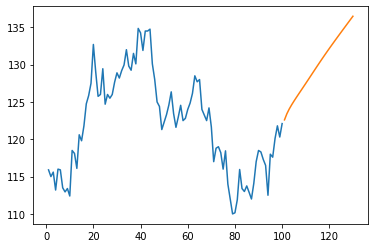

In [30]:
len(df)
plt.plot(day_new,scaler.inverse_transform(df[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

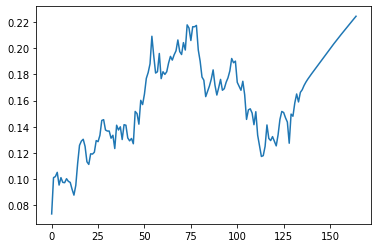

In [31]:
# to get better visualization: -

df_b=df.tolist()
df_b.extend(lst_output)
plt.plot(df_b[1900:])